# Import libs

In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
# Import required modules
sys.path.append('../')  # Go up one directory

from src.data_splitting import split_data, get_split_shapes
from src.model_training import get_models, train_models_for_task
from src.model_evaluation import print_results, print_result_for_task, summarize_results, plot_confusion_matrices

# 1 - Load and split the dataset

In [4]:
# Read in the cleaned data
cleaned_df = pd.read_csv('..\\data\\final_data\\cleaned_train_data.csv')
print(f"Dataset shape: {cleaned_df.shape}")

# Shuffle the data
cleaned_df = cleaned_df.sample(frac=1, random_state=42).reset_index(drop=True)

splits = split_data(cleaned_df, test_size=0.2, random_state=42)

print(get_split_shapes(splits))

Dataset shape: (7956, 135)

main_activity splits:
X_train shape: (6364, 132)
X_test shape: (1592, 132)
y_train shape: (6364,)
y_test shape: (1592,)

label splits:
X_train shape: (6364, 132)
X_test shape: (1592, 132)
y_train shape: (6364,)
y_test shape: (1592,)

sharpness splits:
X_train shape: (6364, 132)
X_test shape: (1592, 132)
y_train shape: (6364,)
y_test shape: (1592,)
None


# 2 - Train and evaluate models for each target

In [5]:
print("\nTraining baseline models...")
results = {}


Training baseline models...


## 2.1 - Main activity (Boning/Slicing)

In [ ]:
X_train, X_test, y_train, y_test = splits['main_activity']

results['main_activity'] = train_models_for_task(
    X_train, X_test, y_train, y_test,
    task_type='binary',
    task_name='Main Activity'
)


Training Main Activity Models...

Training models for Main Activity...

Training Logistic Regression...

Training Random Forest...

Training XGBoost...


## 2.2 - Label/Sub-activity (Multiclass)

In [7]:
X_train, X_test, y_train, y_test = splits['label']
results['label'] = train_models_for_task(
    X_train, X_test, y_train, y_test,
    task_type='multiclass',
    task_name='Label'
)


Training models for Label...

Training Decision Tree...

Training Random Forest...

Training XGBoost...


d:\MotionDataAnalysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\MotionDataAnalysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\MotionDataAnalysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 2.3 - Knife Sharpness

In [8]:
X_train, X_test, y_train, y_test = splits['sharpness']

results['sharpness'] = train_models_for_task(
    X_train, X_test, y_train, y_test,
    task_type='three_class',
    task_name='Knife Sharpness'
)


Training models for Knife Sharpness...

Training Decision Tree...

Training Random Forest...

Training XGBoost...


## 3 - Print results

In [12]:
print_results(results)


Results for main_activity:
--------------------------------------------------

Logistic Regression:
Accuracy: 0.8172
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       838
           1       0.81      0.80      0.81       754

    accuracy                           0.82      1592
   macro avg       0.82      0.82      0.82      1592
weighted avg       0.82      0.82      0.82      1592

Confusion Matrix:
[[696 142]
 [149 605]]

Random Forest:
Accuracy: 0.9102
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       838
           1       0.92      0.88      0.90       754

    accuracy                           0.91      1592
   macro avg       0.91      0.91      0.91      1592
weighted avg       0.91      0.91      0.91      1592

Confusion Matrix:
[[783  55]
 [ 88 666]]

XGBoost:
Accuracy: 0.9454
Classification Report:
              pre

## 4 - Plotting confusion matrices

In [ ]:

print("\nPlotting confusion matrices...")
plot_confusion_matrices(results)

# 5 - Cross-validation scores

In [13]:
from src.model_evaluation import cross_validate_model

# Train baseline models for each target and print cross-validation results
for target, (X_train, X_test, y_train, y_test) in splits.items():
    print(f"\nCross-Validation Results for {target.capitalize()} Models")
    

    if target == 'main_activity':
        models = get_models('binary')  # Retrieve models for the specific task
    else:
        models = get_models('multiclass')
    for model_name, model in models.items():
        mean_cv_score, std_cv_score = cross_validate_model(model, X_train, y_train, cv=10, scoring='accuracy')
        print(f"{model_name}: Mean CV Accuracy = {mean_cv_score:.4f}, Std Dev = {std_cv_score:.4f}")



Cross-Validation Results for Main_activity Models
Logistic Regression: Mean CV Accuracy = 0.8251, Std Dev = 0.0130
Random Forest: Mean CV Accuracy = 0.9134, Std Dev = 0.0162
XGBoost: Mean CV Accuracy = 0.9441, Std Dev = 0.0087

Cross-Validation Results for Label Models
Decision Tree: Mean CV Accuracy = 0.4312, Std Dev = 0.0179
Random Forest: Mean CV Accuracy = 0.6183, Std Dev = 0.0136
XGBoost: Mean CV Accuracy = 0.6410, Std Dev = 0.0121

Cross-Validation Results for Sharpness Models
Decision Tree: Mean CV Accuracy = 0.4868, Std Dev = 0.0289
Random Forest: Mean CV Accuracy = 0.5952, Std Dev = 0.0116
XGBoost: Mean CV Accuracy = 0.6125, Std Dev = 0.0106


# 6 - Summary

In [ ]:
# Summarize the results
summary = summarize_results(results)


Results for main_activity:
--------------------------------------------------

Logistic Regression:
Accuracy: 0.8218

Random Forest:
Accuracy: 0.9299

XGBoost:
Accuracy: 0.9531

Results for label:
--------------------------------------------------

Decision Tree:
Accuracy: 0.4005

Random Forest:
Accuracy: 0.5837

XGBoost:
Accuracy: 0.6431


# 7. Feature Importance Analysis (for tree-based models)

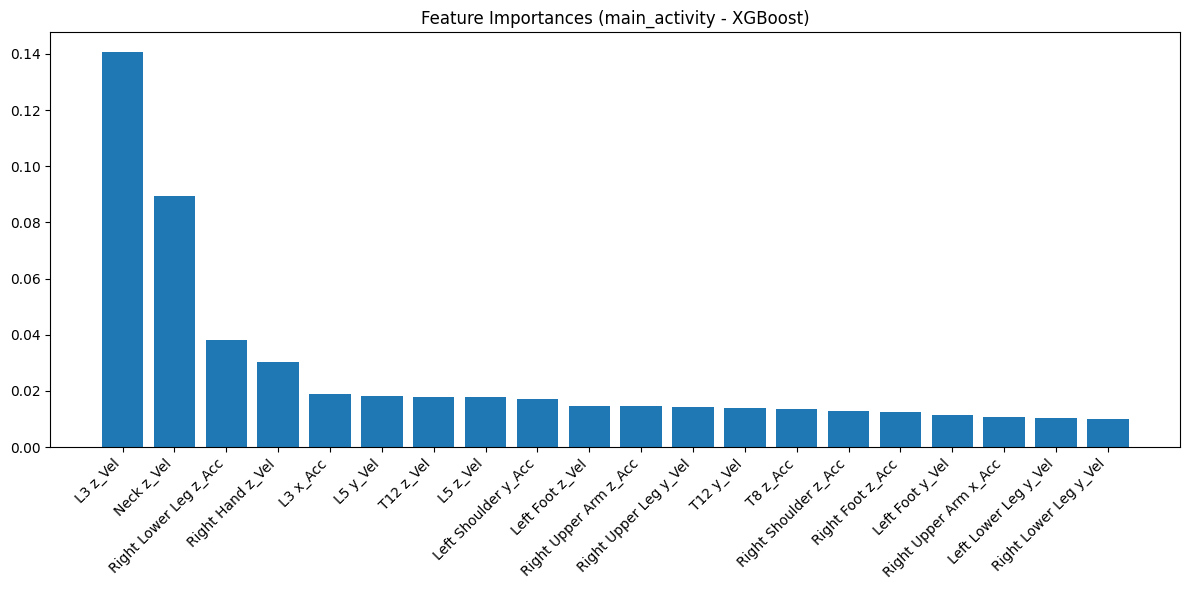

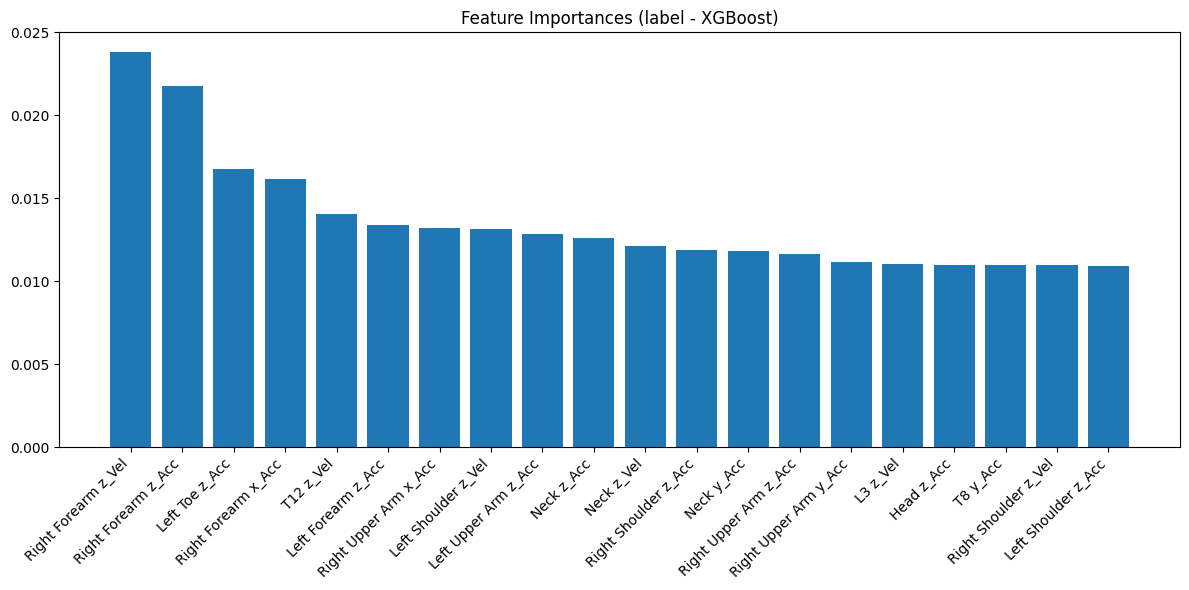

KeyError: 'sharpness'

In [ ]:

def plot_feature_importance(model, feature_names, title):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        plt.figure(figsize=(12, 6))
        plt.title(f"Feature Importances ({title})")
        plt.bar(range(len(indices[:20])), importances[indices[:20]])
        plt.xticks(range(len(indices[:20])), [feature_names[i] for i in indices[:20]], rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Plot feature importance for best models (if tree-based)
feature_names = [col for col in cleaned_df.columns 
                if col not in ['Main_Activity', 'Label', 'Knife_Sharpness_Category']]

for task in results:
    best_model_name = summary[task]['best_model']
    best_model = results[task][best_model_name]['model']
    if hasattr(best_model, 'feature_importances_'):
        plot_feature_importance(best_model, feature_names, f"{task} - {best_model_name}")